# Initial Exploratory Data Analysis (EDA) 📊

This notebook performs the initial data inspection and visualization for the Financial Services Customer Complaints dataset.

## Objectives
1. **Sanity Check**: Identify missing values and empty narratives.
2. **Product Analysis**: Visualize the distribution of complaints across products.
3. **Narrative Analysis**: Analyze the length of complaint narratives.
4. **Cleaning Preview**: Demonstrate the text normalization process.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Add src to path
sys.path.append(os.path.abspath(os.path.join('../src')))
from eda import DataPrep

# Setup plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data & Sanity Check

In [2]:
DATA_PATH = '../data/raw/complaints.csv'
eda = DataPrep(DATA_PATH)

# Load data (this might take a minute for 6GB)
try:
    eda.load_data()
    eda.sanity_check()
except Exception as e:
    print(f"Error: {e}")

Loading data from ../data/raw/complaints.csv...
Data loaded successfully. Shape: (9609797, 18)

--- Sanity Check ---
Data loaded successfully. Shape: (9609797, 18)

--- Sanity Check ---
Missing 'Product': 0 rows
Missing 'Product': 0 rows
Missing 'Consumer complaint narrative': 6629041 rows
Empty string narratives: 0 rows
Whitespace-only narratives: 0 rows
Valid narratives available for analysis: 2980756
Missing 'Consumer complaint narrative': 6629041 rows
Empty string narratives: 0 rows
Whitespace-only narratives: 0 rows
Valid narratives available for analysis: 2980756


# check the overall structure of the data - columns, data header, data types

In [3]:


if eda.df is not None:
    print("DataFrame info:")
    eda.df.info()
    print("\nFirst 5 rows:")
    display(eda.df.head(5))
else:
    print("eda.df is None. Please load the data first (run the cell that calls eda.load_data()).")

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
me

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [4]:
#checking the product column - which products existsing in the data
eda.df["Product"].value_counts()

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

## 2. Product Distribution Analysis

C:\Users\yeget\AppData\Local\Temp\ipykernel_25876\846867256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.index, x=product_counts.values, palette='viridis')


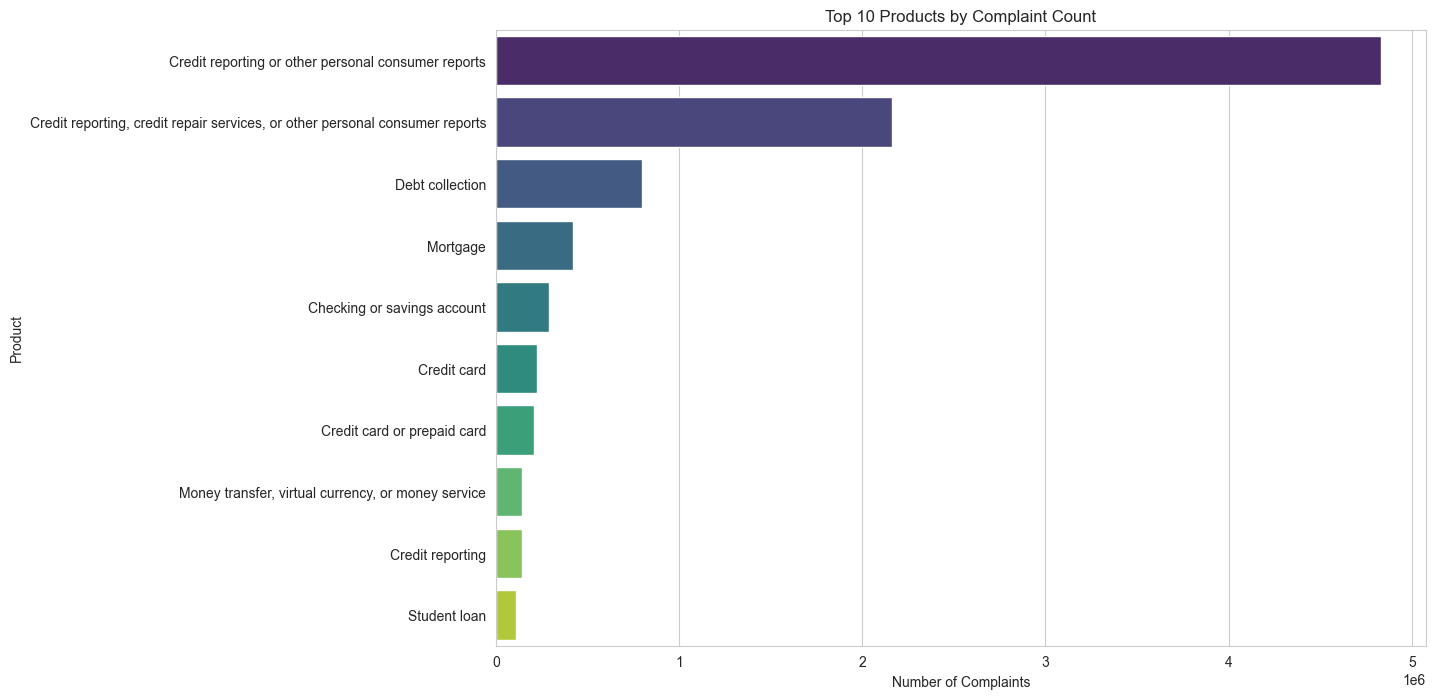

Top Products:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Name: count, dtype: int64


In [5]:
if eda.df is not None:
    plt.figure(figsize=(12, 8))
    product_counts = eda.df['Product'].value_counts().head(10)
    sns.barplot(y=product_counts.index, x=product_counts.values, palette='viridis')
    plt.title('Top 10 Products by Complaint Count')
    plt.xlabel('Number of Complaints')
    plt.show()
    
    print("Top Products:")
    print(product_counts)

## 3. Narrative Length Analysis
We investigate the length of the consumer narratives to inform our chunking strategy.

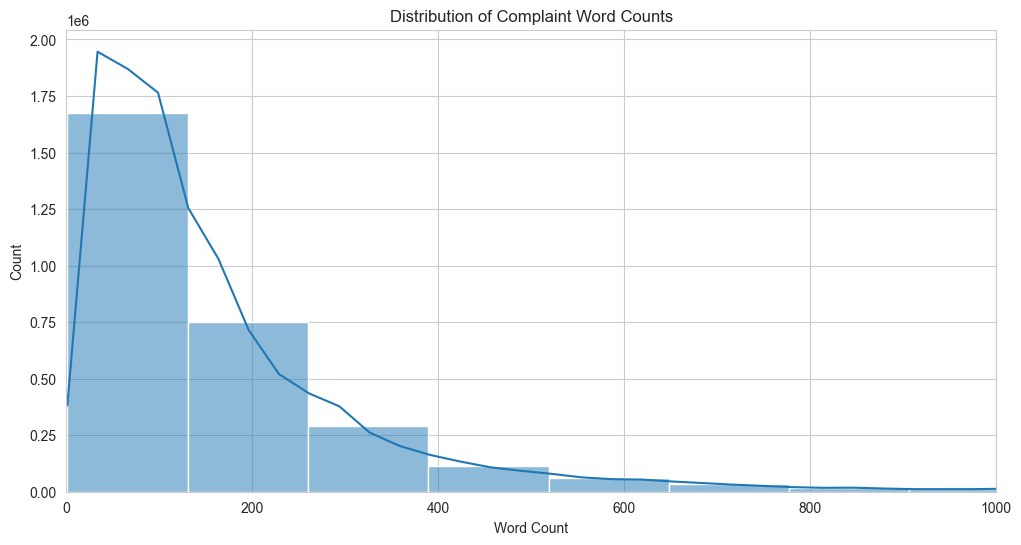

count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: word_count, dtype: float64


In [6]:
if eda.df is not None:
    # Filter only existing narratives for this analysis
    temp_df = eda.df.dropna(subset=['Consumer complaint narrative']).copy()
    temp_df['word_count'] = temp_df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
    
    plt.figure(figsize=(12, 6))
    sns.histplot(temp_df['word_count'], bins=50, kde=True)
    plt.title('Distribution of Complaint Word Counts')
    plt.xlim(0, 1000) # Limiting x-axis to zoom in on typical complaints
    plt.xlabel('Word Count')
    plt.show()
    
    print(temp_df['word_count'].describe())

## 4. Preprocessing & Normalization Demo
We apply the filtering and cleaning steps defined in `src/eda.py`.

In [7]:
# Run full preprocessing (Product Filter -> Drop Nulls -> Text Clean)
if eda.df is not None:
    clean_df = eda.preprocess_data()
    
    # Show before vs after sample
    print("\n--- Cleaning Sample ---")
    sample = clean_df[['Consumer complaint narrative', 'cleaned_narrative']].head(3)
    for i, row in sample.iterrows():
        print(f"Original: {row['Consumer complaint narrative'][:100]}...")
        print(f"Cleaned:  {row['cleaned_narrative'][:100]}...\n")


--- Preprocessing ---
After filtering for 5 target products: 232040 rows
After dropping missing/empty narratives: 82164 rows
Applying advanced text normalization (this may take a while)...
Preprocessing complete.

--- Cleaning Sample ---
Original: A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an acc...
Cleaned:  card opened name fraudster received notice account opened name reached state activity unauthorized c...

Original: Dear CFPB, I have a secured credit card with citibank which is changed to unsecured card and I have ...
Cleaned:  dear cfpb secured credit card citibank changed unsecured card calling waitting check release secured...

Original: I have a Citi rewards cards. The credit balance issued to me was {$8400.00}. I recently moved, which...
Cleaned:  citi reward card credit balance issued recently moved meant bill would lowered meant less use credit...



In [8]:
# Save the cleaned data to CSV and Parquet
if clean_df is not None:
    print("Saving processed data...")
    
    # Save to CSV
    csv_output_path = '../data/processed/cleaned_complaints.csv'
    eda.save_to_csv(csv_output_path)
    
    # Save to Parquet
    parquet_output_path = '../data/processed/cleaned_complaints.parquet'
    eda.save_to_parquet(parquet_output_path)
    
    print(f"\nFinal dataset shape: {clean_df.shape}")
    print("Data saved successfully!")
else:
    print("No cleaned data available. Please run the preprocessing cell first.")

Saving processed data...
Saved processed data to ../data/processed/cleaned_complaints.csv
Saved processed data to ../data/processed/cleaned_complaints.parquet

Final dataset shape: (82164, 19)
Data saved successfully!
